# Exercici 1

Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

In [1]:
#cargamos las librerias que vamos a necesitar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

Cargamos el data set, ponemos el ecoding 'latin-1' por que utf8 no funcionaba, antes de cargar el dataset, lo hemos abierto para observar cómo es su separación, en este caso, es por ';'

In [3]:
# cargamos el data set con la librería de pandas.
datasetUEFA = pd.read_csv('./Lligues europees UEFA.csv', encoding='latin-1', sep=';')
datasetUEFA.head(5)

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas


1. Cuántas filas y columnas tiene el data set?

In [5]:
datasetUEFA.shape

(98, 21)

2. Queremos saber cuál es tu tamaño.

In [8]:
# la función size, nos multiplica el número de columnas por el número de filas, y nos da el tamaño total del dataset.
datasetUEFA.size

2058

3. Vamos a localizar si existe algún dato duplicado. Y observamos que ninguno.

In [9]:
datasetUEFA.loc[datasetUEFA.duplicated()]

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper


4. Vamos a ver el título de las columnas, para entender su contenido.

In [12]:
datasetUEFA.columns

Index(['Rk', 'Squad', 'Country', 'LgRk', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD',
       'Pts', 'Pts/G', 'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'Attendance',
       'Top Team Scorer', 'Goalkeeper'],
      dtype='object')

    5. Y ver cuál el formato en el que están los valores. Comprobamos que son correctos para poder proceder.

In [25]:
datasetUEFA.dtypes

Rk                   int64
Squad               object
Country             object
LgRk                 int64
MP                   int64
W                    int64
D                    int64
L                    int64
GF                   int64
GA                   int64
GD                   int64
Pts                  int64
Pts/G              float64
xG                 float64
xGA                float64
xGD                float64
xGD/90             float64
Last 5              object
Attendance           int64
Top Team Scorer     object
Goalkeeper          object
dtype: object

6. Comprobamos que no existan valores nulos, y NO existen valores nulos. 

In [15]:
datasetUEFA.isnull().sum()

Rk                 0
Squad              0
Country            0
LgRk               0
MP                 0
W                  0
D                  0
L                  0
GF                 0
GA                 0
GD                 0
Pts                0
Pts/G              0
xG                 0
xGA                0
xGD                0
xGD/90             0
Last 5             0
Attendance         0
Top Team Scorer    0
Goalkeeper         0
dtype: int64

### Analizamos estadistica y graficamente los datos

Hacemos una descripción estadística de nuestros datos, diferenciando las variables numéricas y categóricas.

In [17]:
#Añadimos .T para ver los datos de forma vertical
datasetUEFA.describe().T

,count,mean,std,min,25%,50%,75%,max
Rk,98.0,49.500000,28.434134,1.00,25.250,49.50,73.750,98.00
LgRk,98.0,10.316327,5.706926,1.00,5.250,10.00,15.000,20.00
MP,98.0,36.306122,1.152390,34.00,36.000,37.00,37.000,37.00
W,98.0,13.448980,5.747474,3.00,9.000,13.00,17.000,28.00
D,98.0,9.408163,2.903381,3.00,7.000,9.00,11.000,16.00
L,98.0,13.448980,5.123470,2.00,10.000,13.00,17.000,26.00
GF,98.0,50.877551,16.102933,23.00,39.000,47.00,60.000,97.00
GA,98.0,50.877551,13.634602,24.00,40.000,50.00,59.000,89.00
GD,98.0,0.000000,26.501896,-56.00,-17.750,-1.00,17.250,72.00
Pts,98.0,49.734694,16.166371,18.00,37.000,46.00,61.750,90.00


Entramos en detalle, vamos a observar que información nos da las variables "object"

In [18]:
#Analizamos las variables object
datasetUEFA.describe(include = ['O']).T

,count,unique,top,freq
Squad,98,98,Manchester City,1
Country,98,5,ENG,20
Last 5,98,80,W W W L L,4
Top Team Scorer,98,98,Kevin De Bruyne - 15,1
Goalkeeper,98,98,Ederson,1


Comprobamos la corrolación que tiene los datos. 

In [22]:
# Seleccionar solo columnas numéricas
numeric_columns = datasetUEFA.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación entre las columnas numéricas
correlation_matrix = numeric_columns.corr()

# Establecer la diagonal de la matriz de correlación en NaN
np.fill_diagonal(correlation_matrix.values, np.nan)

# Mostrar la matriz de correlación
print(correlation_matrix)

                  Rk      LgRk        MP         W         D         L  \
Rk               NaN  0.988130  0.048452 -0.966555  0.301579  0.924273   
LgRk        0.988130       NaN  0.077611 -0.952942  0.310066  0.910752   
MP          0.048452  0.077611       NaN  0.016391  0.251907  0.063785   
W          -0.966555 -0.952942  0.016391       NaN -0.438612 -0.869553   
D           0.301579  0.310066  0.251907 -0.438612       NaN -0.017991   
L           0.924273  0.910752  0.063785 -0.869553 -0.017991       NaN   
GF         -0.855210 -0.843291 -0.083514  0.880804 -0.364518 -0.800298   
GA          0.837186  0.826181 -0.049424 -0.795596  0.070288  0.841547   
GD         -0.950350 -0.937446 -0.025317  0.944505 -0.257648 -0.919229   
Pts        -0.975809 -0.959944  0.061955  0.986890 -0.288033 -0.929928   
Pts/G      -0.982258 -0.968642 -0.036399  0.986395 -0.315227 -0.936085   
xG         -0.817633 -0.795941 -0.065936  0.851354 -0.325834 -0.785229   
xGA         0.789226  0.779205 -0.0394

Ahora vamos a representar la correlación en gráficos:  
Los gráficos que representan la relación entre las variables serán gráficos de dispersión (scatter plots)

C:\Users\vsanc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


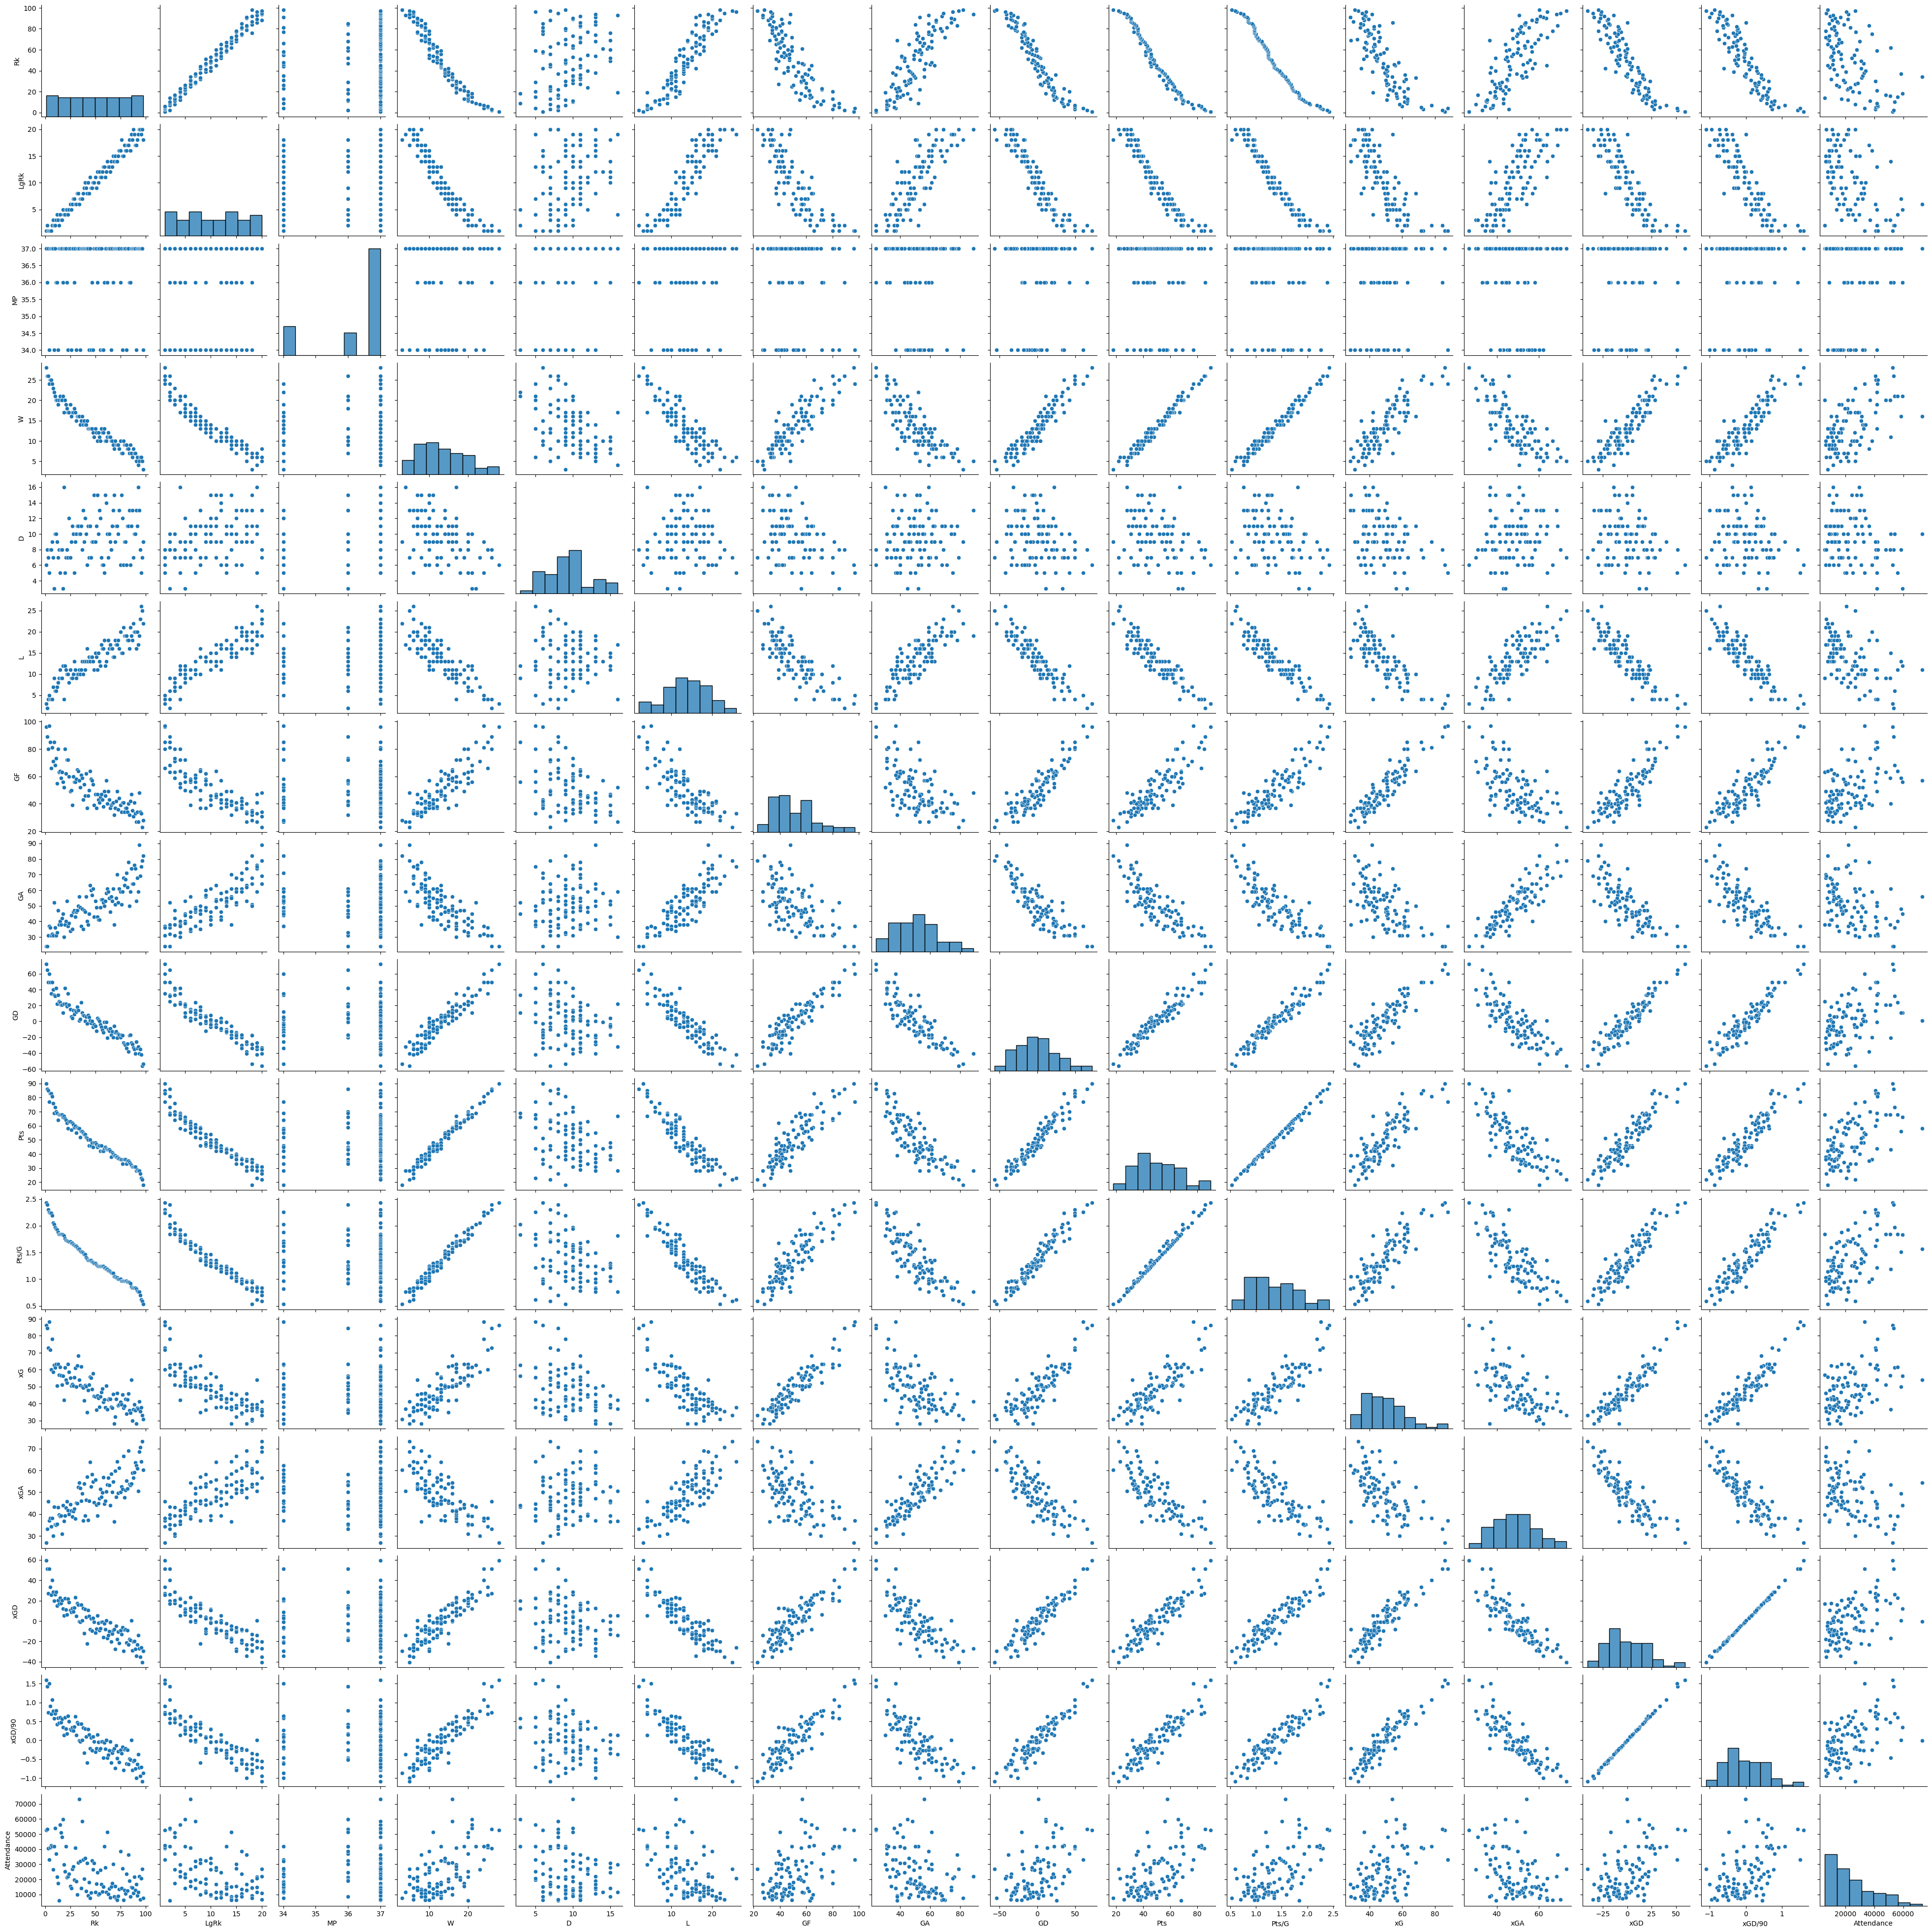

In [23]:
sns.pairplot(datasetUEFA, kind='scatter', diag_kind='auto')
plt.show()

# Exercici 1

Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

Vamos a comprobar si la distribución de los datos tiene forma de campana de Gauss. Para ello vamos a utilizar la prueba de 'normalidad estadística' de Shapiro-Wilk.

El atributo a analizar va a ser la distribución de los partidos ganados 'Rk'. La hipótesis quedaría formulada de la siguiente manera:

h0: La hipótesis nula establece que el atributo 'Rk' tiene una distribución gaussiana.  
h1: La hipótesis alternativa establece que el atributo 'Rk' tiene una distribución no gaussiana.

In [24]:
from scipy.stats import shapiro

stat, p = shapiro(datasetUEFA['Rk'])
print('stat=%.3f, p=%.3f' % (stat, p))
print('El p-value es:', p)

print('-------------')

if p > 0.05:
    print('Probablemente gaussiana(h0)')
else:
    print('Probablemente no gaussiana(h1)')

stat=0.955, p=0.002
El p-value es: 0.001963390037417412
-------------
Probablemente no gaussiana(h1)


**Conclusiones**: Se rechaza la hipótesis nula, por lo tanto no se puede rechazar la hipótesis alternativa. La muestra 'Rk' atribuida a los partidos ganados no tiene una distribución gaussiana.

# Exercici 2

Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

En este caso al trabajar con dos atributos vamos a utilizar una prueba de correlación para ver si estos están relacionados. Aplicaremos el coheficiente de correlación de Pearson.

Los atributos que vamos a seleccionar son: 'MP' que son los partidos jugados durante la temporada con 'W' que son los partidos ganados. La hipótesis la definimos de la siguiente manera:

h0: La hipótesis nula establece que las muestras son independientes.  
h1: La hipótesis alternativa establece que las muestras son dependientes.

In [27]:
from scipy.stats import pearsonr

data1 = datasetUEFA.MP
data2 = datasetUEFA.W
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
print('El p-value es:', p)

print('-------------')


if p > 0.05:
    print('Probablemente independiente(h0)')
else:
    print('Probablemente dependiente(h1)')

stat=0.016, p=0.873
El p-value es: 0.8727303097559086
-------------
Probablemente independiente(h0)


**Conclusiones**: En este caso al ser el p-value (0.87) mayor que el alpha (0.5) no podemos rechazar la hipótesis nula, por tanto nuestras dos variables son independientes.

# Exercici 3

Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

Para el útlimo ejercicio seleccionaremos los siguientes atributos, los partidos jugados durante la temporada (MP), las asistencias (Attendance) y los puntos obtenidos(Pts).

Utilizaremos la prueba de análisis de varianza llamada ANOVA, que nos dirá si las medias de dos o más muestras independientes son significativamente diferentes.

h0: La hipótesis nula establece que las medidas de las muestras son iguales.  
h1: La hipótesis alternativa establece que una o más de las medidas de las muestras son desiguales.

In [31]:
from scipy.stats import f_oneway

data1 = datasetUEFA.MP
data2 = datasetUEFA.Attendance
data3 = datasetUEFA.Pts
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))


print('-------------')


if p > 0.05:
    print('Probablemente las medidas de las muestras son iguales(h0)')
else:
    print('Probablemente tienen diferente distribución(h1)')

stat=259.345, p=0.000
-------------
Probablemente tienen diferente distribución(h1)


**Conclusión**: En este caso al ser el p-value (0.00) menor que el alpha(0.5) hemos de rechazar la hipótesis nula, por tanto es probable que las muestras tengan medidas desiguales.